Loan Approval using Machine Learning algorithms:

Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset using read_csv method from pandas

In [171]:
dataf = pd.read_csv('loan_approval_dataset.csv')

Size of the dataset

In [173]:
print(dataf.shape)

(4269, 8)


In [174]:
dataf.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status
0,2,Graduate,No,9600000,29900000,12,778,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected
2,3,Graduate,No,9100000,29700000,20,506,Rejected
3,3,Graduate,No,8200000,30700000,8,467,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected


Checking the number of approved and rejected records and visualizing using a bar plot.

In [178]:
print(dataf['loan_status'].value_counts())

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


<Axes: >

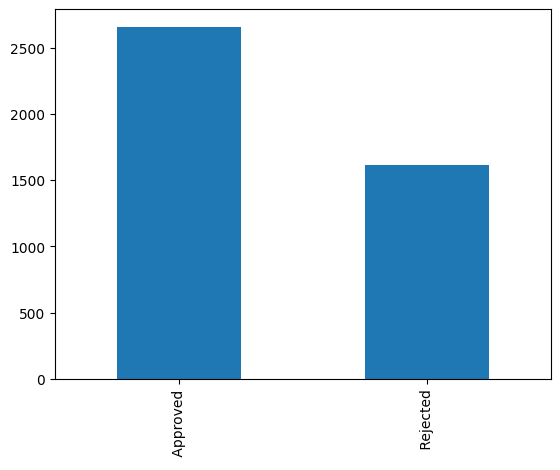

In [177]:
dataf['loan_status'].value_counts().plot.bar()

# Independent variables (Categorical)

 A categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values.

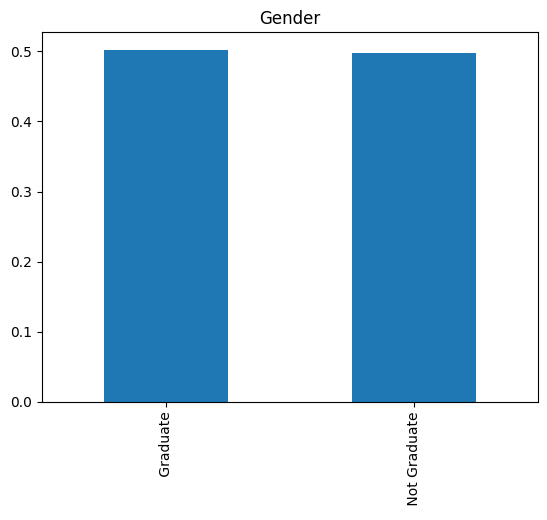

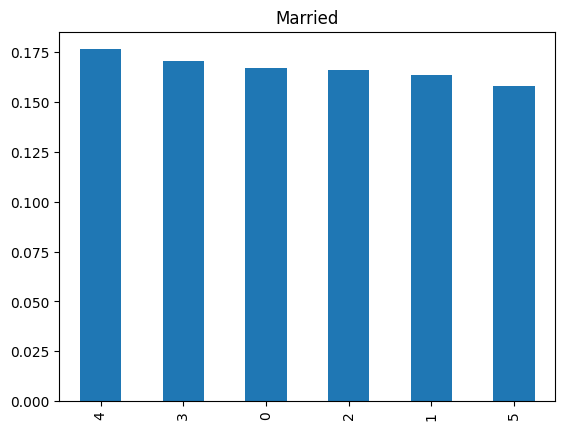

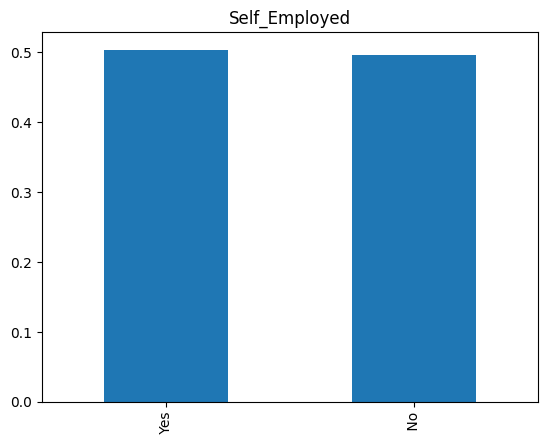

In [ ]:
dataf['education'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
dataf['no_of_dependents'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
dataf['self_employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

# Idependent variables (Numerical)

Visualizing the distribution of annual income:

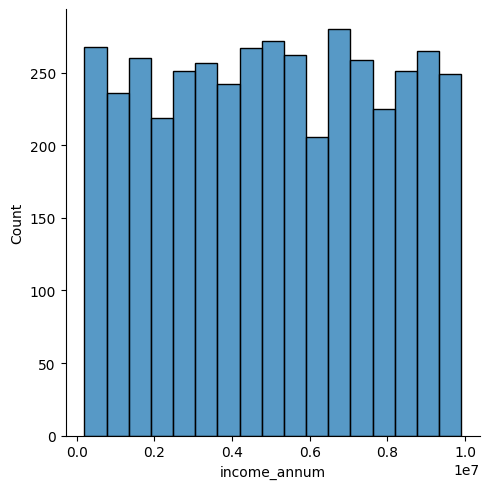

In [ ]:
sns.displot(dataf['income_annum'])

We can see that the annual income is evenly distributed.

Cibil Score distribution bar graph:

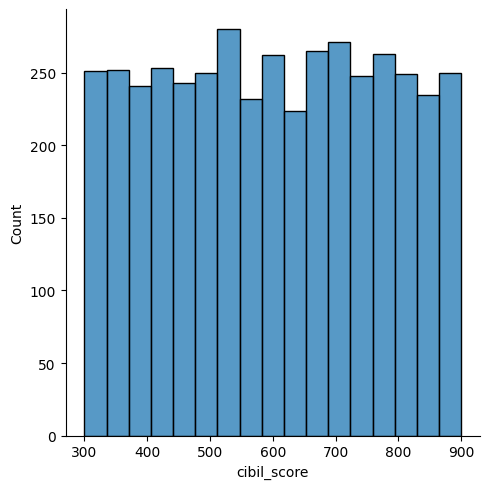

In [ ]:
sns.displot(dataf['cibil_score'])

We can see that the cibil score is also evenly distributed.

Loan Amount distribution plot.

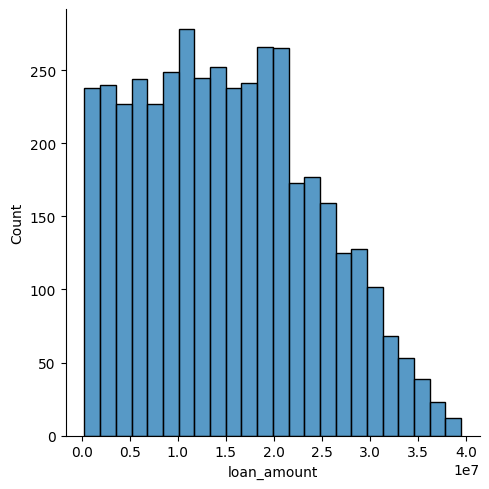

In [ ]:
sns.displot(dataf['loan_amount'])

# Bivariate Analysis
**Categorical Independent Variable vs Target Variable**

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

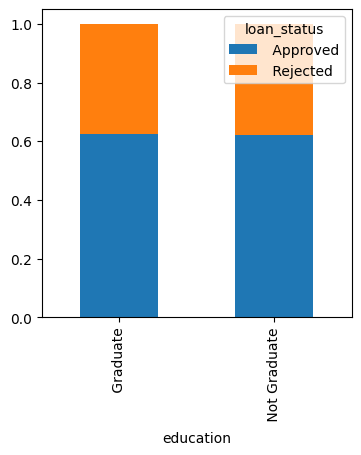

In [179]:
edu=pd.crosstab(dataf['education'],dataf['loan_status'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that graduates and non-graduates, more or less get approved more than getting rejected.

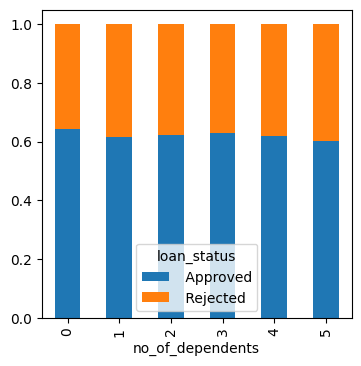

In [180]:
dep=pd.crosstab(dataf['no_of_dependents'],dataf['loan_status'])
dep.div(dep.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It is seen that the number of dependents doesn't make a big difference on loan approval.

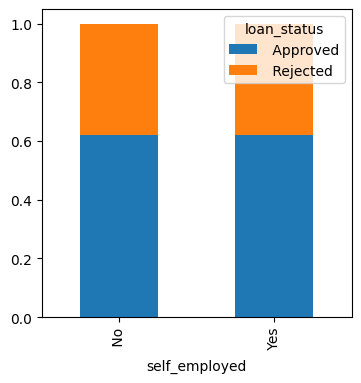

In [ ]:
emp=pd.crosstab(dataf['self_employed'],dataf['loan_status'])
emp.div(emp.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The same can be inferred for self employment. It does not make a big difference on the loan approval.

**Numerical Independent Variable vs Target Variable**

Let's look at the mean of annual income where the loan has been approved vs not approved.

<Axes: xlabel='loan_status'>

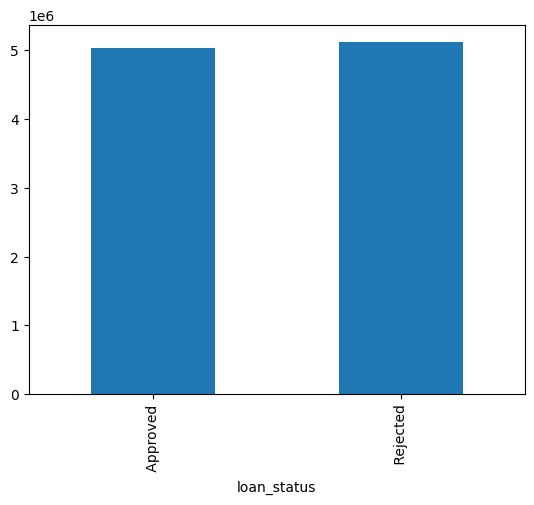

In [ ]:
dataf.groupby('loan_status')['income_annum'].mean().plot.bar()

We do not see much of a difference between the two means. So, we'll try to split it up further into smaller buckets and check it out.


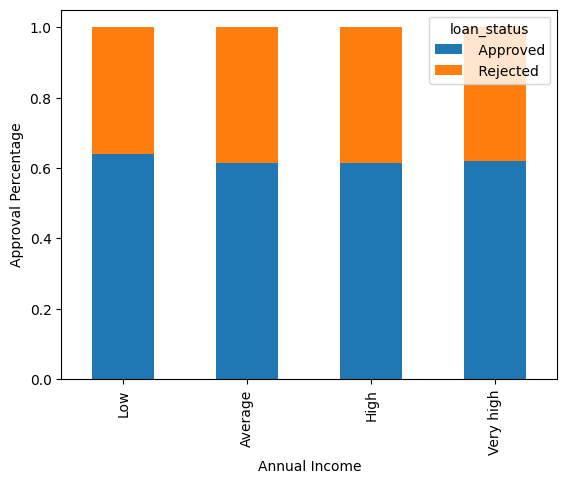

In [ ]:
bins=[0,2500000,5000000,7500000,10000000]
group=['Low','Average','High','Very high']
dataf['Income_bin']=pd.cut(dataf['income_annum'],bins,labels=group)
Income_bin=pd.crosstab(dataf['Income_bin'],dataf['loan_status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Annual Income')
P=plt.ylabel('Approval Percentage')

We can see that the annual income doesn't really play a big role in deciding the outcome.

Now lets visualize the loan amount variable.

<Axes: xlabel='loan_status'>

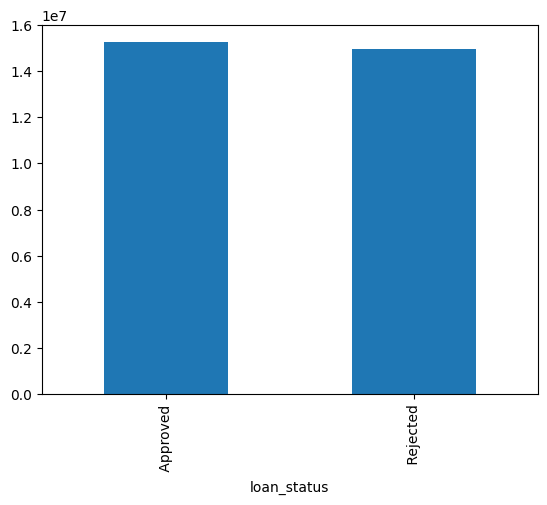

In [ ]:
dataf.groupby('loan_status')['loan_amount'].mean().plot.bar()

We can see that the mean of the approved loan amount is slightly greater than the rejected ones.

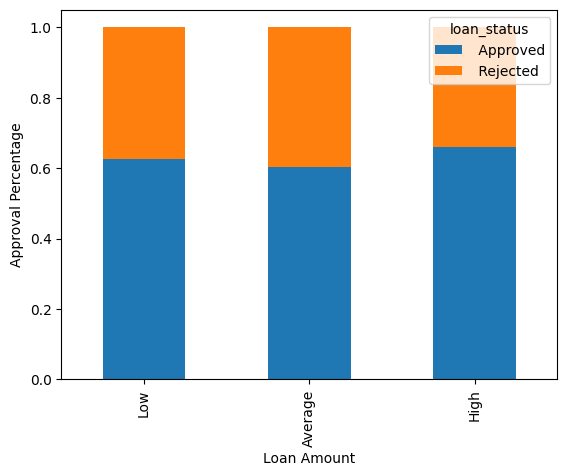

In [ ]:
bins=[0,13000000,26000000,39000000]
group=['Low','Average','High']
dataf['LoanAmount_bin']=pd.cut(dataf['loan_amount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(dataf['LoanAmount_bin'],dataf['loan_status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Loan Amount')
P=plt.ylabel('Approval Percentage')

It can be seen that the proportion of approved loans is lower for Low and Average Loan Amount as compared to that of High Loan Amount.

# Encoding

Encoding all the categorical values using the LabelEncoder from preprocessing in sklearn.

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (dataf.dtypes == 'object')
print(type(obj))
for col in list(obj[obj].index):
  dataf[col] = label_encoder.fit_transform(dataf[col])

<class 'pandas.core.series.Series'>


In [ ]:
edu = []
for i in dataf['education']:
  if i==0:
    edu.append(1)
  else:
    edu.append(0)
dataf['education'] = edu

In [ ]:
l = []
for i in dataf['loan_status']:
  if i==0:
    l.append(1)
  else:
    l.append(0)
dataf['loan_status'] = l

**Correlation**

Now let's look at the correlation between all the variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

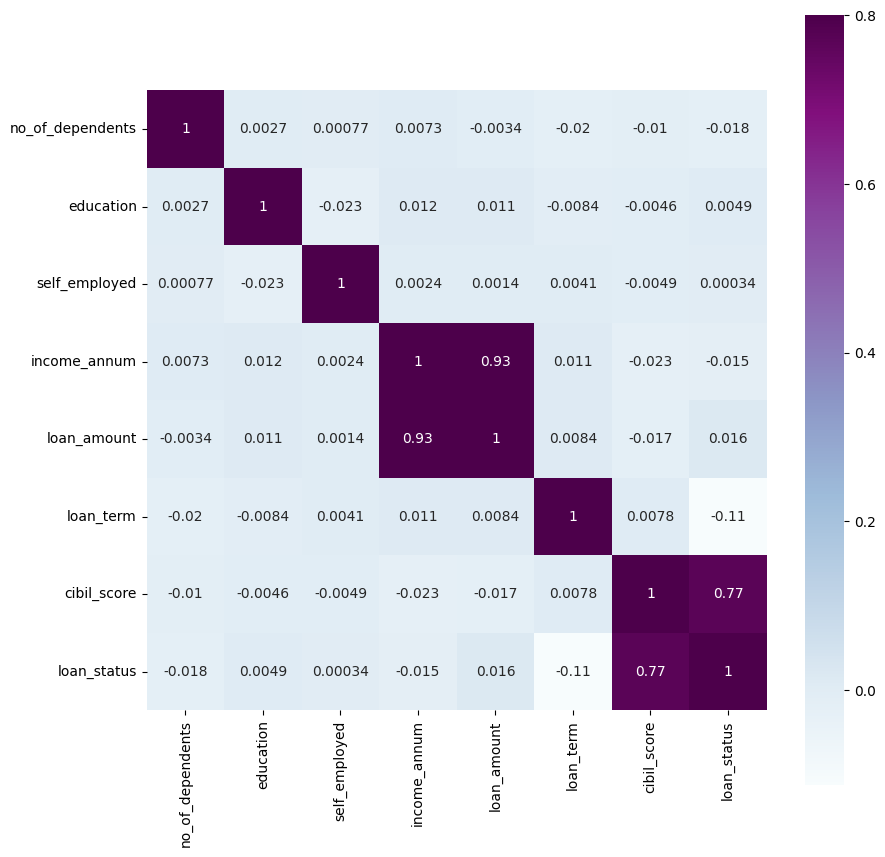

In [ ]:
matrix = dataf.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlated variables are (income_annum - loan_amount) and (cibil_Score - loan_status).

# Model Building

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tools which contains many inbuilt functions that can be used for modeling in Python.

Splitting dataset into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

Xval = dataf.drop(['loan_status'], axis=1)
Yval = dataf['loan_status']


X_train, X_test, Y_train, Y_test = train_test_split(Xval, Yval, train_size=0.8, random_state=5)

Dimensions of training and testing data.

In [ ]:
print(np.array(X_train).shape)
print(np.array(Y_train).shape)
print(np.array(X_test).shape)
print(np.array(Y_test).shape)

(3415, 7)
(3415,)
(854, 7)
(854,)


First model: The Random forest Classifier

The Random Forest algorithm developed by Leo Breiman and Adele Cutler, combines the output of multiple decision trees to reach a single result. It's ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

Training the model and predicting the values for the testing data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7)
model.fit(X_train, Y_train)

yPred = model.predict(X_test)

Second Model: Logistic Regression

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1/0, Yes/No, True/False) given a set of independent variables.

Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event. This function creates an s-shaped curve with the probability estimate, which is very similar to the required step wise function.

Training the model and predicting the values for the testing data

In [ ]:
from sklearn.linear_model import LogisticRegression

modl = LogisticRegression(solver='liblinear', max_iter=1000, C=0.1, penalty='l1')
modl.fit(X_train, Y_train)

yprd = modl.predict(X_test)

Third Model: The Decision tree Classifier

Decision trees are a popular machine learning algorithm that can be used for both regression and classification tasks. They are easy to understand, interpret, and implement, making them an ideal choice for beginners in the field of machine learning.

Training the model and predicting the values for the testing data

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

clfy = clf.predict(X_test)

Comparing the accuracy of the predicted values accross the three models.

In [168]:
from sklearn import metrics

val = metrics.accuracy_score(Y_test, yPred)
acval = metrics.accuracy_score(Y_test, yprd)
valuer = metrics.accuracy_score(Y_test, clfy)

print('Random Forest: ', val)
print('Logistic Regression: ', acval)
print('Decision Tree: ', valuer)

Random Forest:  0.9765807962529274
Logistic Regression:  0.9192037470725996
Decision Tree:  0.9847775175644028
